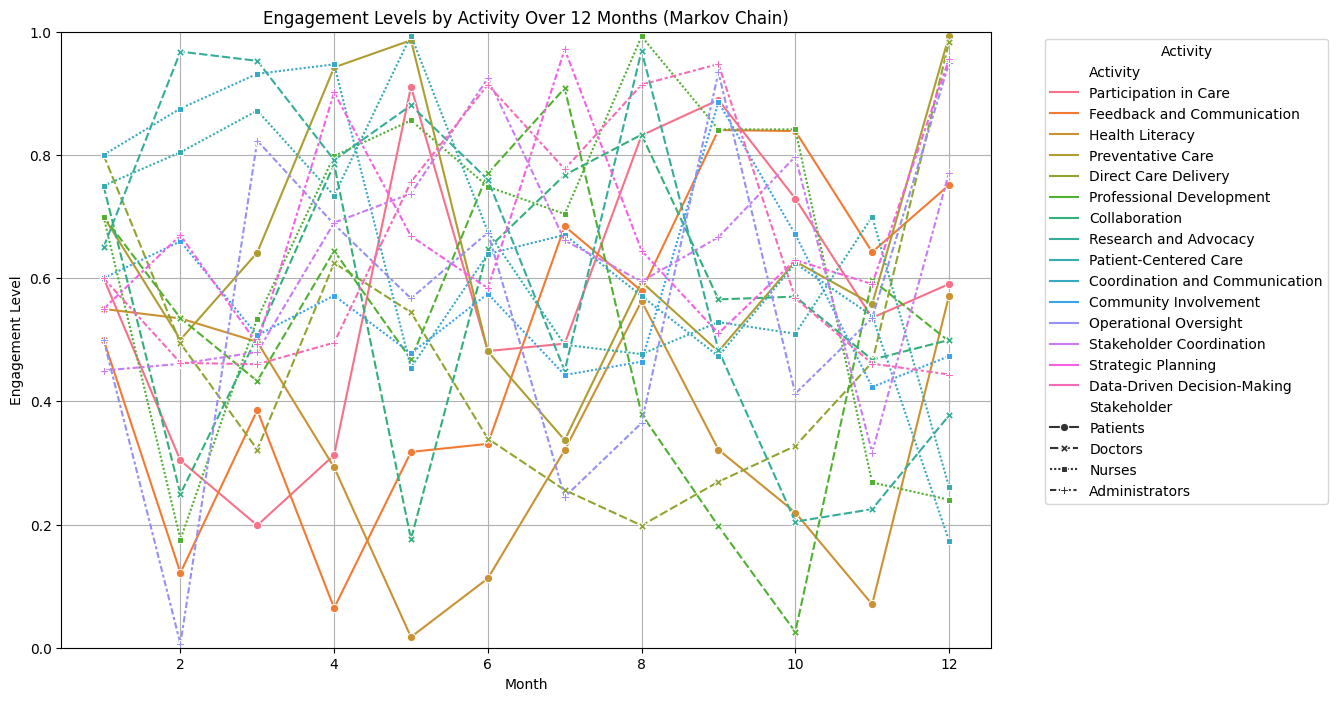

Average Engagement Levels by Stakeholder and Activity (Markov Chain):
Stakeholder     Activity                      
Administrators  Data-Driven Decision-Making       0.649897
                Operational Oversight             0.558173
                Stakeholder Coordination          0.629192
                Strategic Planning                0.680629
Doctors         Collaboration                     0.568026
                Direct Care Delivery              0.468511
                Professional Development          0.512920
                Research and Advocacy             0.642605
Nurses          Community Involvement             0.562627
                Coordination and Communication    0.641549
                Patient-Centered Care             0.649776
                Professional Development          0.641695
Patients        Feedback and Communication        0.504699
                Health Literacy                   0.339171
                Participation in Care             0.57313

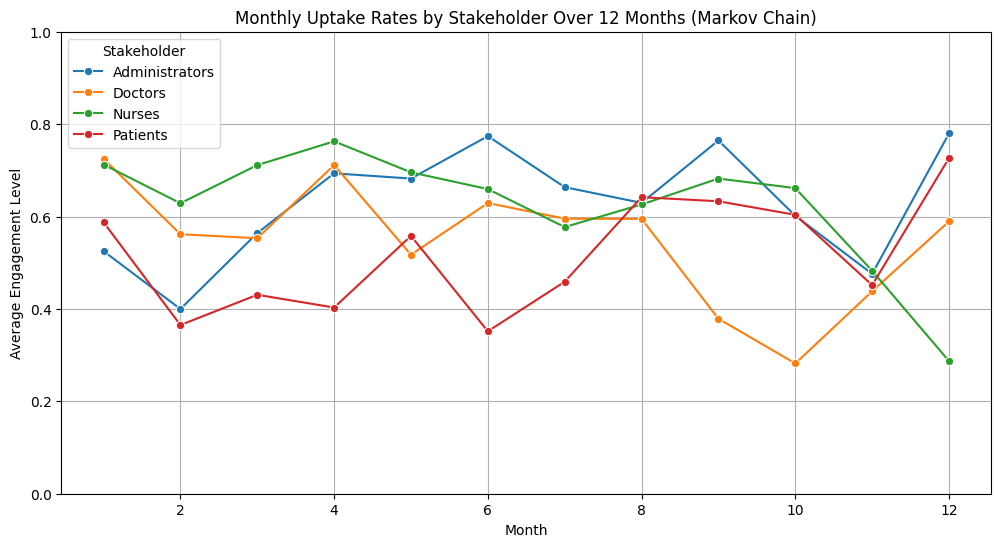

In [1]:
# Markov Chain-Based Dynamic Stakeholder Engagement Simulation and Analysis in Healthcare

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define stakeholders, their activities, and base engagement levels for each activity
stakeholders = {
    'Patients': {
        'activities': {
            'Participation in Care': 0.6,
            'Feedback and Communication': 0.5,
            'Health Literacy': 0.55,
            'Preventative Care': 0.7
        }
    },
    'Doctors': {
        'activities': {
            'Direct Care Delivery': 0.8,
            'Professional Development': 0.7,
            'Collaboration': 0.75,
            'Research and Advocacy': 0.65
        }
    },
    'Nurses': {
        'activities': {
            'Patient-Centered Care': 0.75,
            'Coordination and Communication': 0.8,
            'Professional Development': 0.7,
            'Community Involvement': 0.6
        }
    },
    'Administrators': {
        'activities': {
            'Operational Oversight': 0.5,
            'Stakeholder Coordination': 0.45,
            'Strategic Planning': 0.55,
            'Data-Driven Decision-Making': 0.6
        }
    }
}

# Define discrete states for engagement levels
states = ['Low', 'Medium', 'High']
state_boundaries = {
    'Low': (0.0, 0.4),
    'Medium': (0.4, 0.7),
    'High': (0.7, 1.0)
}

# Example Transition Matrix (probabilities of transitioning between states)
transition_matrix = {
    'Low': [0.6, 0.3, 0.1],  # Low -> [Low, Medium, High]
    'Medium': [0.2, 0.6, 0.2],  # Medium -> [Low, Medium, High]
    'High': [0.1, 0.3, 0.6]   # High -> [Low, Medium, High]
}

# Function to simulate engagement levels with a Markov Chain approach
def simulate_markov_engagement(stakeholders, months=12):
    """Simulate engagement levels over time using a Markov Chain."""
    engagement_over_time = []

    # Initialize engagement levels based on the base engagement
    for stakeholder, data in stakeholders.items():
        for activity, base_engagement in data['activities'].items():
            # Initial state based on the base engagement
            initial_state = 'Low' if base_engagement <= 0.4 else 'Medium' if base_engagement <= 0.7 else 'High'
            current_state = initial_state
            monthly_engagement = [base_engagement]

            # Simulate the Markov Chain over the specified number of months
            for _ in range(1, months):
                # Transition to the next state based on the transition matrix
                transition_probs = transition_matrix[current_state]
                next_state = np.random.choice(states, p=transition_probs)
                # Update the engagement level based on the next state
                state_range = state_boundaries[next_state]
                new_engagement = np.random.uniform(state_range[0], state_range[1])
                monthly_engagement.append(new_engagement)
                current_state = next_state  # Move to the next state

            # Store results for each activity
            for month, engagement in enumerate(monthly_engagement, start=1):
                engagement_over_time.append({
                    'Stakeholder': stakeholder,
                    'Activity': activity,
                    'Month': month,
                    'Engagement': engagement
                })

    return pd.DataFrame(engagement_over_time)

# Simulate engagement levels using the Markov Chain
months = 12
df_activity_engagement = simulate_markov_engagement(stakeholders, months=months)

# Visualization of Engagement Levels by Activity (using the Markov Chain)
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_activity_engagement, x='Month', y='Engagement', hue='Activity', style='Stakeholder', markers=True)
plt.title(f"Engagement Levels by Activity Over {months} Months (Markov Chain)")
plt.xlabel("Month")
plt.ylabel("Engagement Level")
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Activity")
plt.grid()
plt.show()

# Analyzing Average Engagement Levels by Activity
average_engagement = df_activity_engagement.groupby(['Stakeholder', 'Activity'])['Engagement'].mean()
print("Average Engagement Levels by Stakeholder and Activity (Markov Chain):")
print(average_engagement)

# Aggregated Uptake Rate by Stakeholder
def calculate_uptake_rate(df):
    """Calculate uptake rate as the mean engagement across all activities for each stakeholder."""
    return df.groupby('Stakeholder')['Engagement'].mean()

uptake_rates = calculate_uptake_rate(df_activity_engagement)
print("\nOverall Uptake Rate by Stakeholder (Markov Chain):")
print(uptake_rates)

# Visualizing Uptake Rates Over Time
monthly_uptake = df_activity_engagement.groupby(['Month', 'Stakeholder'])['Engagement'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_uptake, x='Month', y='Engagement', hue='Stakeholder', marker="o")
plt.title(f"Monthly Uptake Rates by Stakeholder Over {months} Months (Markov Chain)")
plt.xlabel("Month")
plt.ylabel("Average Engagement Level")
plt.ylim(0, 1)
plt.grid()
plt.legend(title="Stakeholder")
plt.show()
